# CMSC478 Machine Learning

# Assignment-2: Classification with Logistic Regression and SVM

*Connor Ragan AN72374* 

## Overview and Learning Objectives

You've learnt many new topics and concepts in the last 3 chapters (chapter 3, 4, and 5). You learned various performance evaluation strategies that you can use to evaluate your classification and regression models. You also learned that Support Vector Machines (SVM) is an effective algorithm for solving a wide range of ML problems.

In Part I of this assignment, you are going to build and compare three classifiers applied on the breast cancer dataset. You will also perform fine-tuning the parameters. As an <font color="green">  extra credit</font> opportunity in Part II, you train a SVM classifier for image classification.

Pedagogically, this assignment will help you:
- better understand SVM, as well as logistic regression.

- how to perform error analysis, parameter settings and model selection.

- practice plotting techniques using matplotlib.

- pratice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Classification with SGD, Logistic Regression, and SVM

In Assignment-1, you built a SGD classifier with a good accuracy on the breast cancer dataset. You are now going to build two more classifiers that can be applied on the same datset using the following algorithms: Logistic Regression, and Support Vector Machines (SVM).

- You will compare the three classifiers SGD, Logistic Regression and SVM with respect to their parameters and three accuracy measures: f score, auc (ROC), and cross validation.

- You will use a grid-search strategy (or brute-force, i.e. trial and error) to fine-tune the parameters of your classifiers.

- You will use matplotlib to plot your results.

Let's first load the data.

In [3]:
# Import necessary Python modules
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
cancer_data = datasets.load_breast_cancer()

Since the type of the variable `breast_cancer` which holds our data is `Bunch` and is a dictionary-like data structure, we extract features and labels and explore their shape to better understand the data. This version of `breast_cancer` dataset has thirty features which are specifications of the tumor as well as two classes/labels `['malignant' 'benign']`.

The data set consists of 569 samples.

In [5]:
# Extract features and labels
label_names = cancer_data['target_names']
labels = cancer_data['target']
feature_names = cancer_data['feature_names']
features = cancer_data['data']

In [6]:
print(label_names)
print(labels[0], labels[1])
print(feature_names)
print(features[0])

['malignant' 'benign']
0 0
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [7]:
features.shape

(569, 30)

In [8]:
labels.shape

(569,)

We can also use pandas to load the data as a dataframe, and then we can use pandas methods to visualize our data.

In [9]:
import pandas as pd

In [10]:
cancer_df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [11]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


> The following cell would plot a histogram of `mean radius` values.

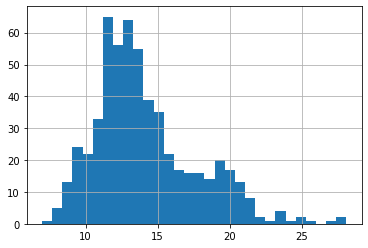

In [12]:
cancer_df['mean radius'].hist(bins=30)

> The following cell would plot a histogram of `mean radius` values across the two different classes with two different colors. Notice that it is a similar histogram, but can tell us the frequency of `mean radius` values across the binary classes.

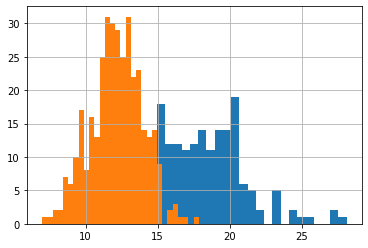

In [13]:
for class_number in np.unique(cancer_data.target):
    plt.figure(1)
    cancer_df['mean radius'].iloc[np.where(cancer_data.target == class_number)[0]].hist(bins=30)

As you see, it looks like that `mean radius` is highly correlated with the class labels, there is a clear distinction in two classes in terms of the mean radius. Data visualization often helps us get better insights about the data before we tackle to solve the ML problem.

And now, we can split the data. The split ratio we are going to choose is 0.7 for training and 0.3 for testing.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)
print(X_train)
print(X_test.shape)
print(y_train)
print(y_test.shape)
print(X_train[0])

[[1.374e+01 1.791e+01 8.812e+01 ... 6.019e-02 2.350e-01 7.014e-02]
 [1.337e+01 1.639e+01 8.610e+01 ... 8.978e-02 2.048e-01 7.628e-02]
 [1.469e+01 1.398e+01 9.822e+01 ... 1.108e-01 2.827e-01 9.208e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
(171, 30)
[1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0
 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 

And, we can now choose which classifier from the built-in classifiers in sklearn we want to choose. We are going to use three classifiers: Stochastic Gradient Descent Classifier (SGD), Logist Regression and Support Vector Machines (SVM). We start with SGD.

Complete the following cells.

## <font color="red"> Required Coding

In [21]:
import warnings
warnings.filterwarnings("ignore")

### START CODING HERE ###
# Import necessary module from sklearn.linear_model
from sklearn.linear_model import SGDClassifier

# Call SGDClassifier with a random_state of 42
sgd_clf = SGDClassifier(alpha = .001, random_state=42, verbose=1)

# Fit the model to X_train and y_train
sgd_clf.fit(X_train, y_train)

# Make predictions on X_test and store the results in y_pred
y_pred = sgd_clf.predict(X_test)

### END CODING HERE ###

-- Epoch 1
Norm: 9121.41, NNZs: 30, Bias: 172.846213, T: 398, Avg. loss: 741135.454686
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8359.92, NNZs: 30, Bias: 216.184497, T: 796, Avg. loss: 196476.028283
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7145.00, NNZs: 30, Bias: 237.610356, T: 1194, Avg. loss: 98982.872432
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6790.72, NNZs: 30, Bias: 254.218374, T: 1592, Avg. loss: 77298.994095
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5979.26, NNZs: 30, Bias: 261.883279, T: 1990, Avg. loss: 48556.038617
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5462.77, NNZs: 30, Bias: 267.899818, T: 2388, Avg. loss: 36934.617011
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5090.48, NNZs: 30, Bias: 274.474054, T: 2786, Avg. loss: 32621.692247
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4646.33, NNZs: 30, Bias: 277.922027, T: 3184, Avg. loss: 25389.039541
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4391.64

>Now, evaluate your model using the metrics you've learnt in class.

## <font color="red"> Required Coding

In [19]:
warnings.filterwarnings("ignore")

### START CODING HERE ###
# Import the necessary modules from sklearn for f1_score, roc_auc_score and cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute the f1_score, roc_auc_score and cross_val_score and store them in properly named variables: 
# f1_score_sgd, auc_sgd, cv_sgd
# Hint: for cross validation with 5 folds, you should call the method on
# (sgd_clf, cancer_data.data, cancer_data.target, cv=5)
f1_score_sgd = f1_score(y_test, y_pred)
auc_sgd = roc_auc_score(y_test, y_pred)
cv_sgd = cross_val_score(sgd_clf, cancer_data.data, cancer_data.target, cv=5)
### END CODING HERE ###

# Print the performance measures
print("f1_score: ", f1_score_sgd)
print("auc: ", auc_sgd)
print("cross validation: ", cv_sgd.mean())

f1_score:  0.958139534883721
auc:  0.9451058201058201
cross validation:  0.8695806079261255


>Now, let's try logistic regression.

## <font color="red"> Required Coding

In [15]:
### START CODING HERE ###
# Import necessary module from sklearn.linear_model for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Call LogisticRegression with a random_state of 0, solver='liblinear'
logreg_clf = LogisticRegression(random_state=0,solver='liblinear')

# Fit the model to X_train and y_train
logreg_clf.fit(X_train, y_train)

# Make predictions on X_test and store the results in y_pred
y_pred = logreg_clf.predict(X_test)

# Compute the f1_score, roc_auc_score and cross_val_score and store them in properly named variables: 
# f1_score_logreg, auc_logreg, cv_logreg
# Hint: for cross validation with 5 folds, you should call the method on
# (logreg_clf, cancer_data.data, cancer_data.target, cv=5)
f1_score_logreg = f1_score(y_test, y_pred)
auc_logreg = roc_auc_score(y_test, y_pred)
cv_logreg = cross_val_score(logreg_clf, cancer_data.data, cancer_data.target, cv=5)
### END CODING HERE ###

# Print the performance measures
print("f1_score: ", f1_score_logreg)
print("auc: ", auc_logreg)
print("cross validation: ", cv_logreg.mean())

f1_score:  0.9724770642201834
auc:  0.958994708994709
cross validation:  0.9509041939207385


Looks like Logistic Regression performed better on this dataset so far, although without parameter tuning. Can you improve your reults by tuning the parameters of SGD (any parameter) or parameters of Logistic Regression? You can check the full list of parameters for each classifier in its sklearn documentation page, [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This kind of parameter settings is a brute-force or grid-search strategy. You need to try changing at least three parameters, but only report the results below if you noticed any improvements higher than 1% in any of the scores.

Report your results HERE:

Baseline results:

    f1_score:  0.9600000000000001
    auc:  0.9285714285714286
    cross validation:  0.8574066948826472
    
SGD improved by changing the parameter loss to 'squared_hinge'

    f1_score:  0.9677419354838711  <--- improved
    auc:  0.9543650793650794  <--- improved
    cross validation:  0.8824009234320893  <--- improved
    
SGD improved by changing the parameter penalty to 'none'

    f1_score:  0.9423076923076924
    auc:  0.9378306878306878  <--- improved
    cross validation:  0.8981454405540592  <--- improved
    
SGD improved by changing the parameter alpha to .001

    f1_score:  0.9468599033816424
    auc:  0.9457671957671958  <--- improved
    cross validation:  0.8695806079261255  <--- improved

Finally, let's try SVM.

## <font color="red"> Required Coding

In [16]:
# Import necessary module from sklearn for svm
from sklearn import svm

### START CODING HERE ###
# Call svm.SVC with kernel='linear', gamma=10, C=10
svm_clf = svm.SVC(kernel='linear',gamma=10,C=10)

# Fit the model to X_train and y_train
svm_clf.fit(X_train,y_train)

# Make predictions on X_test and store the results in y_pred
y_pred = svm_clf.predict(X_test)

# Compute the f1_score, roc_auc_score and cross_val_score and store them in properly named variables: 
# f1_score_svm, auc_svm, cv_svm
# Hint: for cross validation with 5 folds, you should call the method on
# (svm_clf, cancer_data.data, cancer_data.target, cv=5)
f1_score_svm = f1_score(y_test,y_pred)
auc_svm = roc_auc_score(y_test,y_pred)
cv_svm = cross_val_score(svm_clf, cancer_data.data, cancer_data.target, cv=5)
### END CODING HERE ###

# Print the performance measures
print("f1_score: ", f1_score_svm)
print("auc: ", auc_svm)
print("cross validation: ", cv_svm.mean())

f1_score:  0.9767441860465117
auc:  0.9702380952380952
cross validation:  0.9526433243555215


>Now, change the svm kernel to `'poly'` and `'rbf'` which are non-linear kernels, and see if they improve or hurt the results or have no significant impact. Report your results HERE:

Baseline results:

    f1_score:  0.9767441860465117
    auc:  0.9702380952380952
    cross validation:  0.9526433243555215
    
Poly results (max_iter = 10000):

    f1_score:  0.9310344827586207
    auc:  0.873015873015873
    cross validation:  0.6456944978838015

Rbf results:

    f1_score:  0.7741935483870968
    auc:  0.5
    cross validation:  0.6274259330511736
    
Clearly a linear kernel gives the best results, both poly and rbf hurt the results

> How about parameter C? Does it have any impact on the performance? Complete the following cell and plot the impact of varying C in range `[1..100]` on f1_score. Once implemented, running this cell may take a few minutes to generate the correct plot.

## <font color="red"> Required Coding

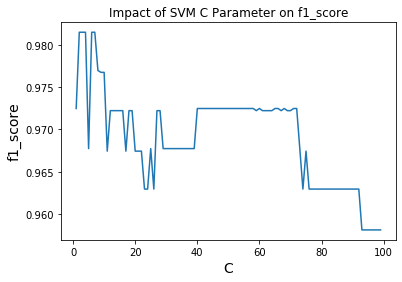

In [17]:
# Create two lists for C_values and f_scores
C_values = range(1, 100)
f_scores = []

### START CODING HERE ###
# Write a for loop that does the following steps:
# iterate over c in C_values
for c in C_values:
    # call svm model in each iteration passing a linear kernel, gamma=10 and the current c
    svm_clf = svm.SVC(kernel='linear',gamma=10,C=c)
    # fit the model on X_train and y-train
    svm_clf.fit(X_train,y_train)
    # predict X_test and store them in y_pred
    y_pred = svm_clf.predict(X_test)
    # compute f1_score and append it to f_scores
    f_scores.append(f1_score(y_test,y_pred))
### END CODING HERE ###

plt.title('Impact of SVM C Parameter on f1_score')
plt.xlabel('C', fontsize=14)
plt.ylabel('f1_score', fontsize=14)
plt.plot(C_values, f_scores)

Answer the following question HERE:

Q1- Based on your plot, what ranges/values for C are optimal? What ranges/values may not be so good?

The lower range of values (C<20) are better with what looks like around C=5 or C=8 being optimal. C between 22-25, >70, and especially >90 are bad ranges.

Q2- What happens to f1_score for C values closer to 100? Compared to C=1, would the SVM street be wider or narrower?

For C closer to 100, the f1_score decreases. The SVM street is narrower at these high C values. 

Q3- Why do you fit the classifier for cross_val_score on the whole dataset instead of `(X_train, y_train)` only?

The cross_val_score classifier does K fold cross validation, so it is picking a random fold to be the test fold and training on the others. Since it splits the data into test and train itself, it makes sense to fit the classifier to the entire dataset rather than just the portion we have declared train prior.

## Part II - Image Classification with SVM -  <font color="green"> Optional - Extra Credit

Download and extract [CIFAR-10 dataset](https://www.cs.utoronto.ca/~kriz/cifar.html). It consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The required steps in the pipeline of Part II:

- 1- Load the image dataset using the provided helper functions in CIFAR website or the functions you write.

- 2- Train a linear or non-linear SVM classifier that can classify the images.

- 3- Fine-tune your model to improve your results.

You may also search for open-source solutions and reproduce their results provided that you do **ALL** of the followings:

- Properly cite and reference any source or website you've consulted with.

- Only use SVMs for this part of the assignment.

- Include a section in your notebook written by yourself for fine-tuning the SVM parameters to improve the available benchmark results of CIFAR-10.

You should include all of the PART II code in THIS notebook.

If your model meets **ALL** of the requirements above, at my discretion and judgement of your work, you may be rewarded with extra credit equivalent to up to 50% of what Assignment-2 is worth in the final weighting/grading of the Assignment part of your final grade. This could be an opportunity to reserve some points for the points you may lose in your future assignments. Assignment-2 extra credit **can't** be used to compensate for other parts of your grade such as quiz or exams.

## Grading

For assignment 2, your notebook will be run and graded manually with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 75 points:
- 15 points per SGD and Logistic Regression (total 30 points): correct implementation for each classifier and getting correct score results
- 20 points: correct SVM implementation and results
- 25 points: correct plot of C vs f1_score

Part I questions have 15 points (5 points each).

The remaining 10 points will be based on your writing and formatting as instructed in the notebook.  Follow the instructions of each section carefully. Points will be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

Part II is optional and is an extra credit opportunity.

## How to Submit and Due Date

Name your notebook ```Lastname-A2.ipynb```.  So, for me it would be ```Vafaei-A2.ipynb```.  Submit the file using the ```Assignment-2``` link on Blackboard.

Grading will be based on 

  * correct behavior of the required functions, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday Oct 14th 11:59PM.</b></font>